In [1]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fordgo = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(fordgo.shape)
print(fordgo.dtypes)
print(fordgo.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
fordgo.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
fordgo_v2 = fordgo.copy()

In [6]:
fordgo_v2.dropna(inplace = True)

In [7]:
fordgo_v2.query("user_type == 'Customer' and bike_share_for_all_trip == 'Yes'").count().bike_id

0

In [8]:
fordgo_v2.start_station_name.nunique()

329

In [9]:
fordgo_v2.bike_id.nunique()

4607

In [10]:
fordgo_v2.drop(['start_station_id', 'start_station_longitude', 'start_station_latitude',
                'end_station_id', 'end_station_longitude', 'end_station_latitude',
               'bike_share_for_all_trip'], axis = 1, inplace = True)

In [11]:
fordgo_v2['start_time'] = fordgo_v2['start_time'].apply(lambda x: pd.Timestamp(x))
fordgo_v2['end_time'] = fordgo_v2['end_time'].apply(lambda x: pd.Timestamp(x))

In [12]:
fordgo_v2['bike_id'] = fordgo_v2['bike_id'].astype('object')

In [13]:
fordgo_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   bike_id             174952 non-null  object        
 6   user_type           174952 non-null  object        
 7   member_birth_year   174952 non-null  float64       
 8   member_gender       174952 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 13.3+ MB


In [14]:
print(fordgo_v2.duplicated().sum())

0


In [15]:
fordgo_v2.shape[0]

174952

In [16]:
fordgo_v2.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male


In [17]:
fordgo_v2.describe()

,duration_sec,member_birth_year
count,174952.000000,174952.000000
mean,704.002744,1984.803135
std,1642.204905,10.118731
min,61.000000,1878.000000
25%,323.000000,1980.000000
50%,510.000000,1987.000000
75%,789.000000,1992.000000
max,84548.000000,2001.000000


In [18]:
fordgo_v2['duration_min'] = (fordgo_v2['duration_sec']/60).astype(int)

In [19]:
fordgo_v2.drop(['duration_sec'], axis = 1, inplace = True)

In [20]:
fordgo_v2['start_weekday'] = fordgo_v2['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
fordgo_v2['end_weekday'] = fordgo_v2['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [21]:
fordgo_v2['start_hour'] = fordgo_v2['start_time'].dt.hour
fordgo_v2['end_hour'] = fordgo_v2['end_time'].dt.hour

In [22]:
fordgo_v2['member_age'] = (2019 - fordgo_v2['member_birth_year']).astype(int)

In [23]:
fordgo_v2.drop(['member_birth_year'], axis = 1, inplace = True)

In [24]:
fordgo_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          174952 non-null  datetime64[ns]
 1   end_time            174952 non-null  datetime64[ns]
 2   start_station_name  174952 non-null  object        
 3   end_station_name    174952 non-null  object        
 4   bike_id             174952 non-null  object        
 5   user_type           174952 non-null  object        
 6   member_gender       174952 non-null  object        
 7   duration_min        174952 non-null  int32         
 8   start_weekday       174952 non-null  object        
 9   end_weekday         174952 non-null  object        
 10  start_hour          174952 non-null  int64         
 11  end_hour            174952 non-null  int64         
 12  member_age          174952 non-null  int32         
dtypes: datetime64[ns](2), int32(2

In [25]:
fordgo_v2.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,duration_min,start_weekday,end_weekday,start_hour,end_hour,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,869,Thu,Fri,17,8,35
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,1030,Thu,Fri,12,5,47
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,608,Thu,Fri,17,4,30
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,26,Thu,Fri,23,0,45
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,29,Thu,Fri,23,0,60


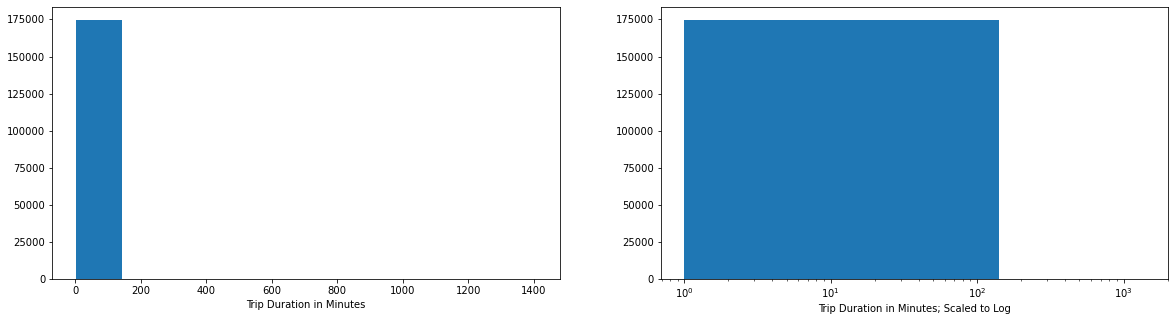

In [26]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.hist(data = fordgo_v2, x = 'duration_min')
plt.xlabel('Trip Duration in Minutes');

plt.subplot(1, 2, 2)
plt.hist(data = fordgo_v2, x = 'duration_min')
plt.xscale('log')
plt.xlabel('Trip Duration in Minutes; Scaled to Log');

In [27]:
duration_high_outliers = ((fordgo_v2['duration_min'] > 200))
print(duration_high_outliers.sum())
print(fordgo_v2.loc[duration_high_outliers,:])

294
                    start_time                end_time  \
0      2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2      2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3      2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
199    2019-02-28 18:23:19.035 2019-02-28 22:35:22.294   
297    2019-02-28 18:28:18.728 2019-02-28 22:05:59.954   
...                        ...                     ...   
177912 2019-02-01 14:22:14.557 2019-02-01 18:41:15.818   
178416 2019-02-01 08:40:28.487 2019-02-01 17:20:31.553   
178649 2019-02-01 12:50:10.691 2019-02-01 16:48:51.797   
178656 2019-02-01 13:13:12.725 2019-02-01 16:48:07.003   
182411 2019-02-01 04:38:43.601 2019-02-01 08:25:33.493   

                                       start_station_name  \
0        Montgomery St BART Station (Market St at 2nd St)   
2                                 Market St at Dolores St   
3                                 Grove St at Masonic Ave   
199                          The Embarcadero at Bryant 

In [28]:
fordgo_v2 = fordgo_v2.loc[- duration_high_outliers,:]

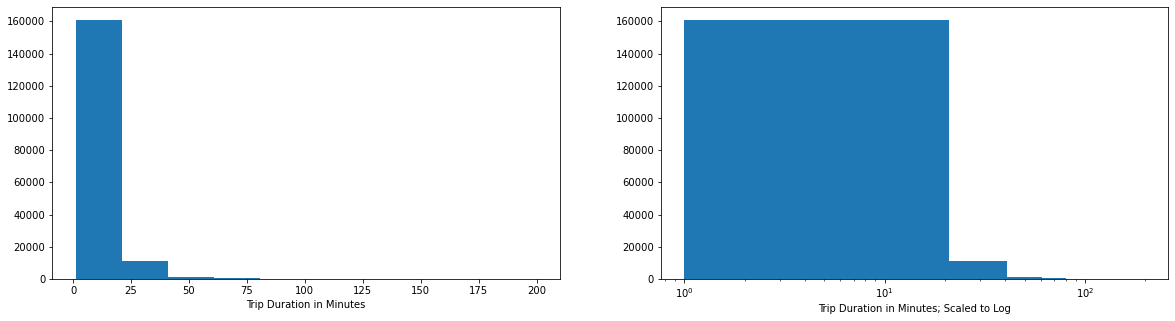

In [29]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.hist(data = fordgo_v2, x = 'duration_min')
plt.xlabel('Trip Duration in Minutes');

plt.subplot(1, 2, 2)
plt.hist(data = fordgo_v2, x = 'duration_min')
plt.xscale('log')
plt.xlabel('Trip Duration in Minutes; Scaled to Log');

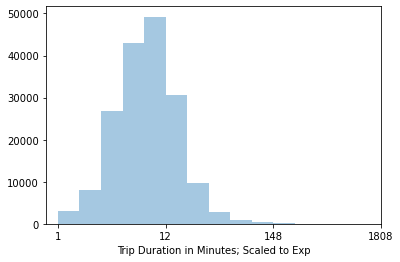

In [30]:
def exp_trans(x, inverse = False):
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x)    

data = fordgo_v2['duration_min'];

bin_edges = np.arange(0, exp_trans(data.max())+0.5, 0.5);
tick_locs = np.arange(0, exp_trans(data.max())+2.5, 2.5);

sb.distplot(data.apply(exp_trans), bins = bin_edges, kde = False);

plt.xticks(tick_locs, exp_trans(tick_locs, inverse = True).astype(int));
plt.xlabel('Trip Duration in Minutes; Scaled to Exp');

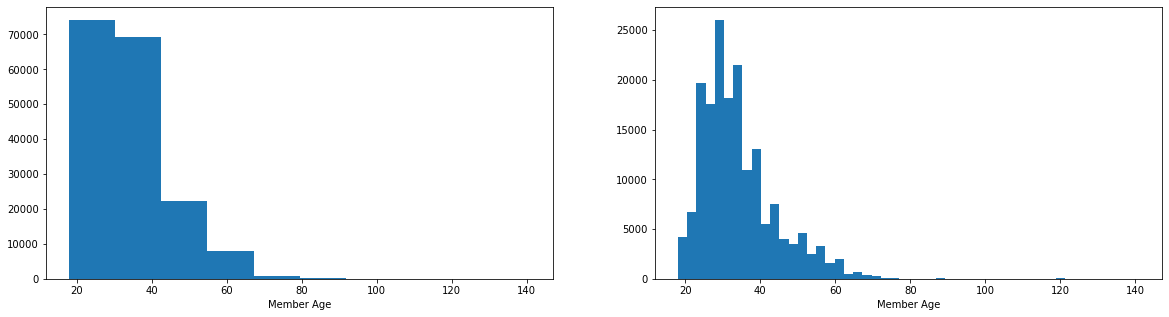

In [31]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.hist(data = fordgo_v2, x = 'member_age')
plt.xlabel('Member Age');

plt.subplot(1, 2, 2)
plt.hist(data = fordgo_v2, x = 'member_age', bins = 50)
plt.xlabel('Member Age');

In [32]:
age_high_outliers = ((fordgo_v2['member_age'] > 90))
print(age_high_outliers.sum())
print(fordgo_v2.loc[age_high_outliers,:])

77
                    start_time                end_time  \
1285   2019-02-28 19:29:17.627 2019-02-28 19:31:45.967   
10827  2019-02-27 19:21:34.436 2019-02-27 19:43:30.008   
16087  2019-02-27 08:37:36.864 2019-02-27 08:56:28.022   
17981  2019-02-26 19:53:38.528 2019-02-26 19:59:44.968   
18885  2019-02-26 17:48:59.016 2019-02-26 17:56:11.370   
...                        ...                     ...   
173711 2019-02-03 09:45:30.464 2019-02-03 10:02:04.169   
177708 2019-02-01 19:09:28.387 2019-02-01 19:34:55.963   
177885 2019-02-01 18:38:40.471 2019-02-01 18:47:18.392   
182830 2019-02-01 07:45:05.934 2019-02-01 07:52:14.922   
183388 2019-02-01 00:39:53.112 2019-02-01 00:48:03.338   

                                       start_station_name  \
1285                        Shattuck Ave at Telegraph Ave   
10827                                 Bryant St at 2nd St   
16087                             Grove St at Masonic Ave   
17981                               2nd St at Townsend S

In [33]:
fordgo_v2 = fordgo_v2.loc[- age_high_outliers,:]

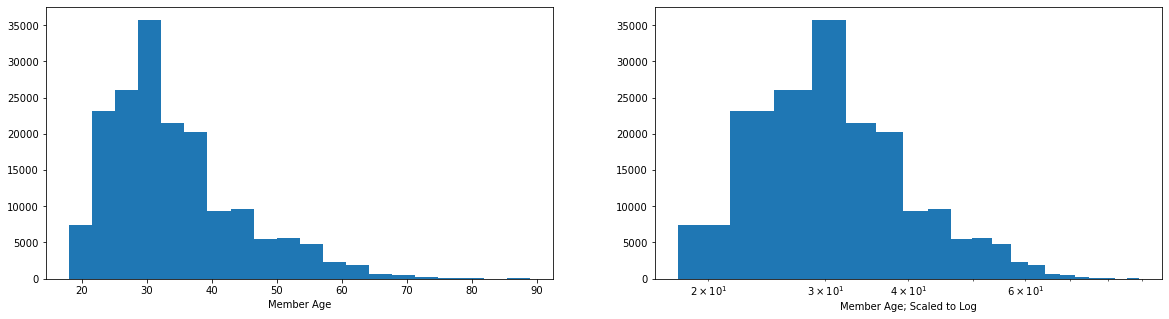

In [35]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.hist(data = fordgo_v2, x = 'member_age', bins = 20)
plt.xlabel('Member Age');

plt.subplot(1, 2, 2)
plt.hist(data = fordgo_v2, x = 'member_age', bins = 20)
plt.xscale('log')
plt.xlabel('Member Age; Scaled to Log');

In [36]:
fordgo_v2.describe().member_age

count    174581.000000
mean         34.160040
std           9.970203
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: member_age, dtype: float64

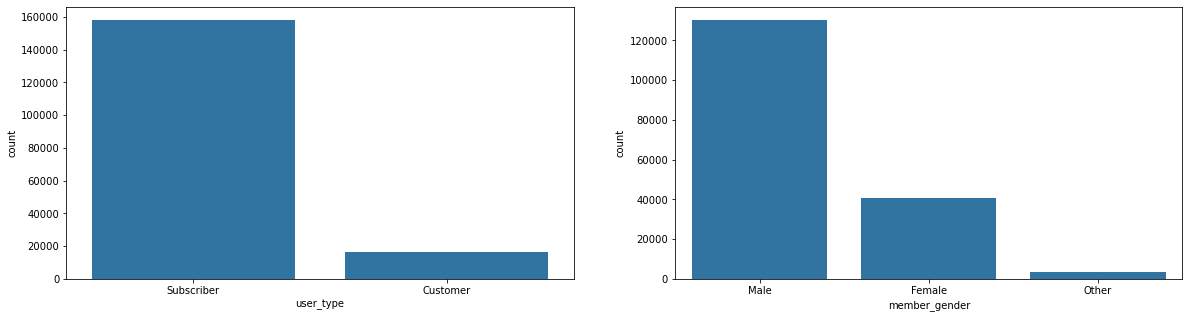

In [37]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = fordgo_v2, x = 'user_type', color = base_color);

plt.subplot(1, 2, 2)
sb.countplot(data = fordgo_v2, x = 'member_gender', color = base_color);

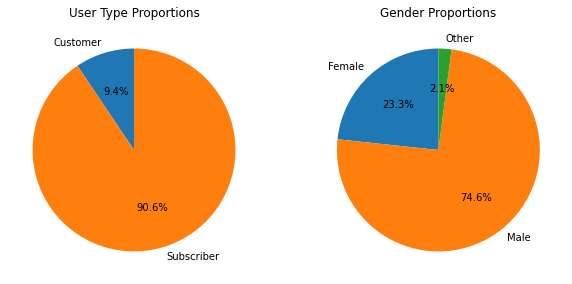

In [38]:
plt.figure(figsize = [10, 10])

plt.subplot(1, 2, 1)
fordgo_v2.groupby('user_type').size().plot(kind = 'pie', x = 'user_type', y = 0, startangle = 90, 
                                    autopct = '%1.1f%%', legend = False)
plt.title('User Type Proportions')
plt.ylabel(None);

plt.subplot(1, 2, 2)
fordgo_v2.groupby('member_gender').size().plot(kind = 'pie', x = 'member_gender', y = 0, startangle = 90, 
                                    autopct = '%1.1f%%', legend = False)
plt.title('Gender Proportions')
plt.ylabel(None);

In [39]:
weekdays = fordgo_v2['start_weekday'].value_counts()
weekdays

Thu    33651
Tue    30525
Wed    28380
Fri    27601
Mon    25585
Sun    14466
Sat    14373
Name: start_weekday, dtype: int64

In [40]:
ordinal_var_dict = {'start_weekday': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                    'end_weekday': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgo_v2[var] = fordgo_v2[var].astype(ordered_var)

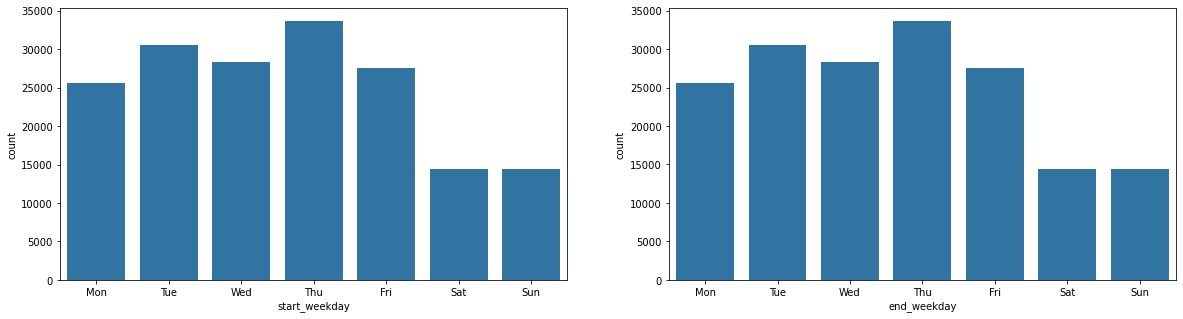

In [41]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = fordgo_v2, x = 'start_weekday', color = base_color);

plt.subplot(1, 2, 2)
sb.countplot(data = fordgo_v2, x = 'end_weekday', color = base_color);

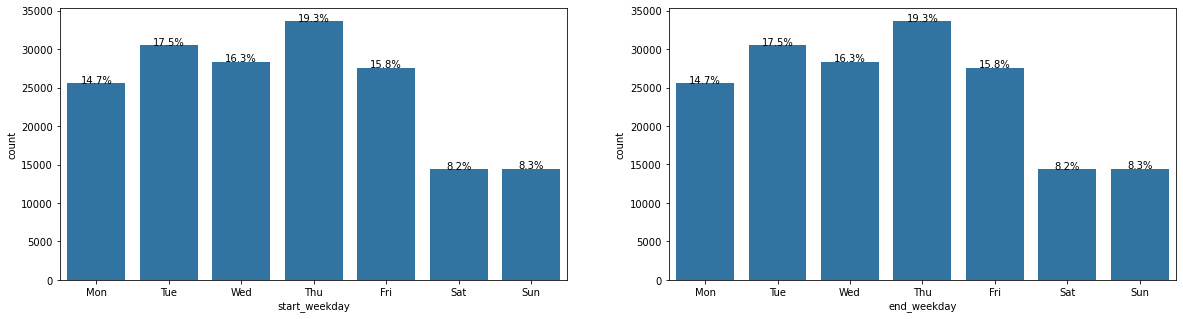

In [42]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = fordgo_v2, x = 'start_weekday', color = base_color);


start_day_counts = fordgo_v2['start_weekday'].value_counts()
start_n_day = fordgo_v2['start_weekday'].value_counts().sum()

locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = start_day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / start_n_day)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    
plt.subplot(1, 2, 2)
sb.countplot(data = fordgo_v2, x = 'end_weekday', color = base_color);

end_day_counts = fordgo_v2['end_weekday'].value_counts()
end_n_day = fordgo_v2['end_weekday'].value_counts().sum()

locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = end_day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / end_n_day)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

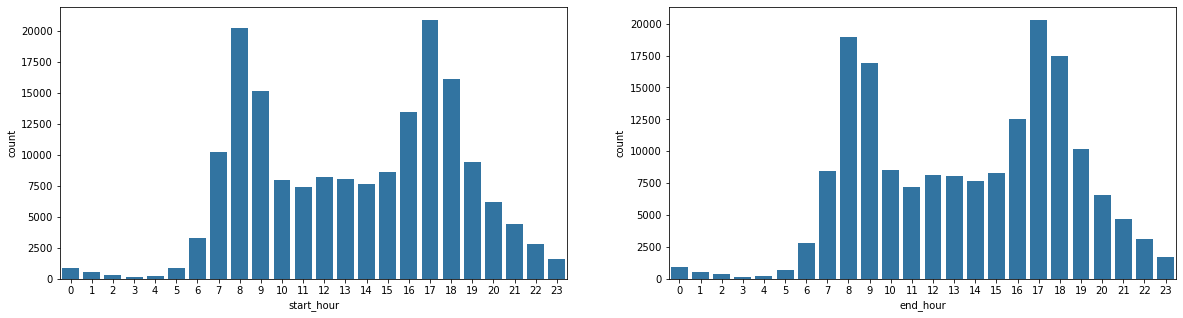

In [43]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = fordgo_v2, x = 'start_hour', color = base_color);

plt.subplot(1, 2, 2)
sb.countplot(data = fordgo_v2, x = 'end_hour', color = base_color);

In [44]:
start_station = fordgo_v2["start_station_name"].value_counts().nlargest(5)
end_station = fordgo_v2["end_station_name"].value_counts().nlargest(5)

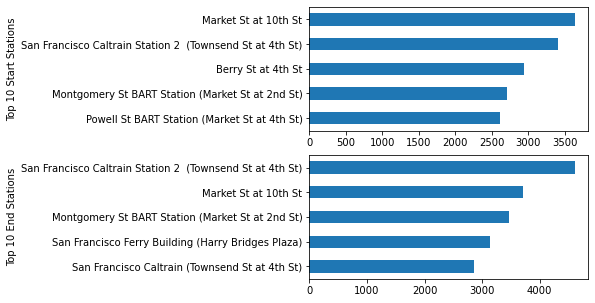

In [45]:
plt.figure(figsize = [5, 5])

plt.subplot(2, 1, 1)
start_station.sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('Top 10 Start Stations');

plt.subplot(2, 1, 2)
end_station.sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('Top 10 End Stations');

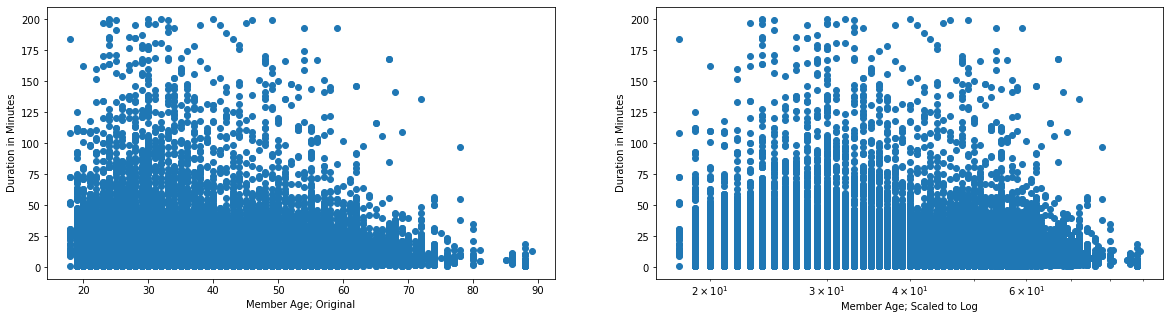

In [46]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.scatter(data = fordgo_v2, x = 'member_age', y = 'duration_min');
plt.ylabel('Duration in Minutes')
plt.xlabel('Member Age; Original');

plt.subplot(1, 2, 2)
plt.scatter(data = fordgo_v2, x = 'member_age', y = 'duration_min');
plt.ylabel('Duration in Minutes')
plt.xscale('log')
plt.xlabel('Member Age; Scaled to Log');

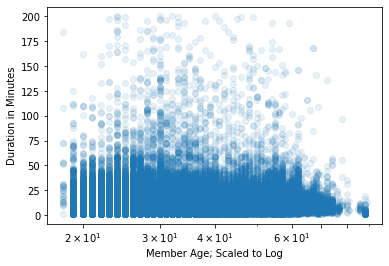

In [47]:
plt.scatter(data = fordgo_v2, x = 'member_age', y = 'duration_min', alpha = 1/10)
plt.ylabel('Duration in Minutes')
plt.xscale('log')
plt.xticks([20, 30, 40, 60, 70, 80])
plt.xlabel('Member Age; Scaled to Log');

In [48]:
numeric_vars = ['member_age', 'duration_min']
categoric_vars = ['start_weekday', 'user_type', 'member_gender']

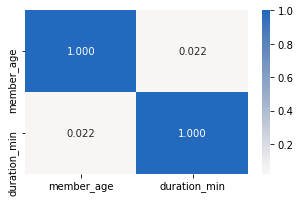

In [49]:
# correlation plot
plt.figure(figsize = [5, 3])
sb.heatmap(fordgo_v2[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

<Figure size 720x720 with 0 Axes>

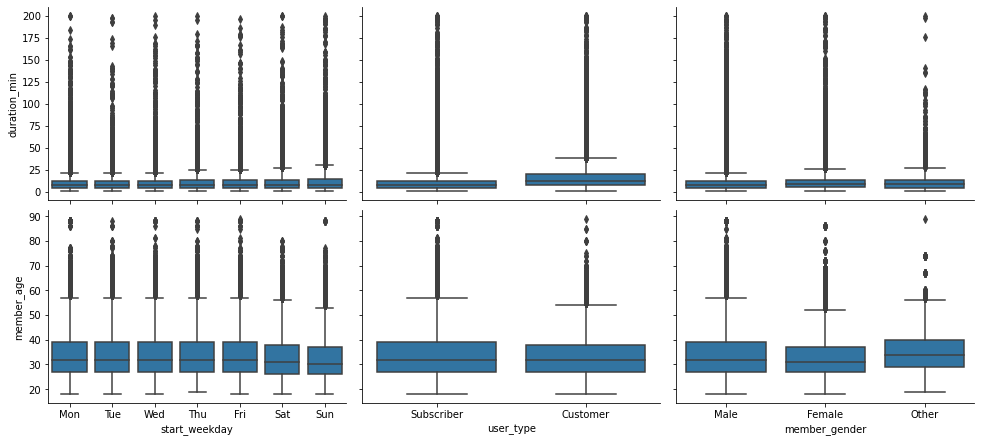

In [50]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = fordgo_v2, y_vars = ['duration_min', 'member_age'], x_vars = categoric_vars,
                height = 3, aspect = 1.5);
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

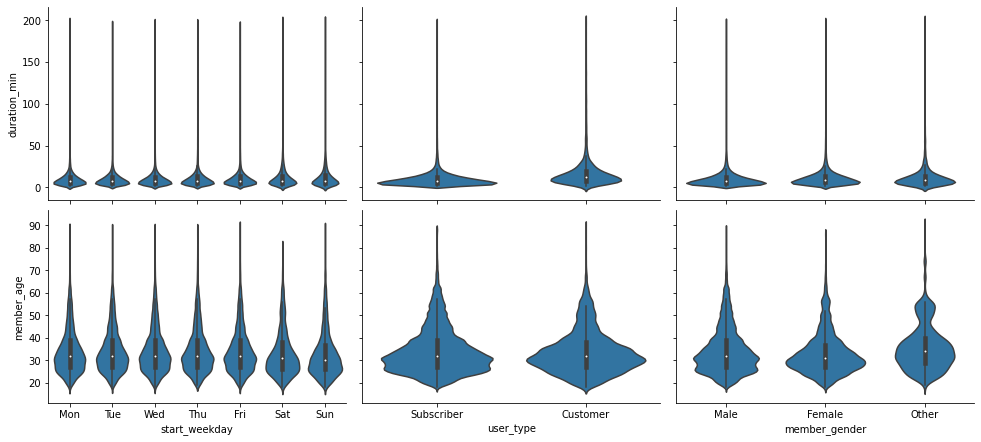

In [51]:
def violingrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = fordgo_v2, y_vars = ['duration_min', 'member_age'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(violingrid)
plt.show();

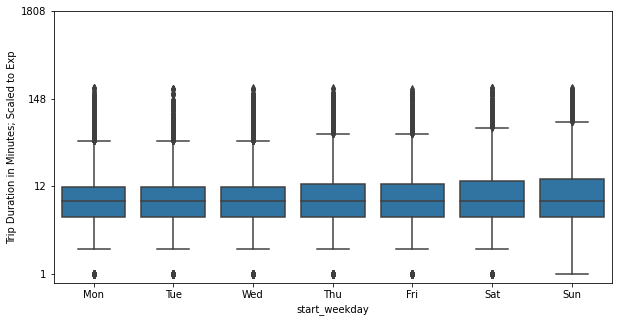

In [52]:
def exp_trans(x, inverse = False):
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x)    

duration_exp = fordgo_v2['duration_min']

plt.figure(figsize = [10, 5])

bin_edges = np.arange(0, exp_trans(data.max())+0.5, 0.5)
tick_locs = np.arange(0, exp_trans(data.max())+2.5, 2.5)
sb.boxplot(data = fordgo_v2, x = 'start_weekday', y = duration_exp.apply(exp_trans), color = base_color)
plt.yticks(tick_locs, exp_trans(tick_locs, inverse = True).astype(int))
plt.ylabel('Trip Duration in Minutes; Scaled to Exp');

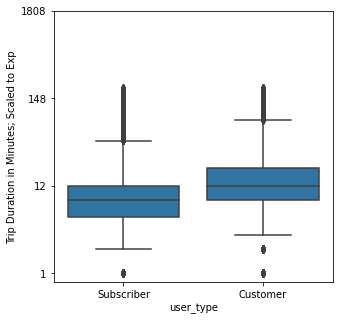

In [53]:
def exp_trans(x, inverse = False):
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x)    

duration_exp = fordgo_v2['duration_min']

plt.figure(figsize = [5, 5])

bin_edges = np.arange(0, exp_trans(data.max())+0.5, 0.5)
tick_locs = np.arange(0, exp_trans(data.max())+2.5, 2.5)
sb.boxplot(data = fordgo_v2, x = 'user_type', y = duration_exp.apply(exp_trans), color = base_color)
plt.yticks(tick_locs, exp_trans(tick_locs, inverse = True).astype(int))
plt.ylabel('Trip Duration in Minutes; Scaled to Exp');

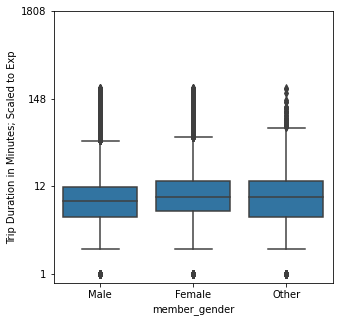

In [54]:
def exp_trans(x, inverse = False):
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x)    

duration_exp = fordgo_v2['duration_min']

plt.figure(figsize = [5, 5])

bin_edges = np.arange(0, exp_trans(data.max())+0.5, 0.5)
tick_locs = np.arange(0, exp_trans(data.max())+2.5, 2.5)
sb.boxplot(data = fordgo_v2, x = 'member_gender', y = duration_exp.apply(exp_trans), color = base_color)
plt.yticks(tick_locs, exp_trans(tick_locs, inverse = True).astype(int))
plt.ylabel('Trip Duration in Minutes; Scaled to Exp');

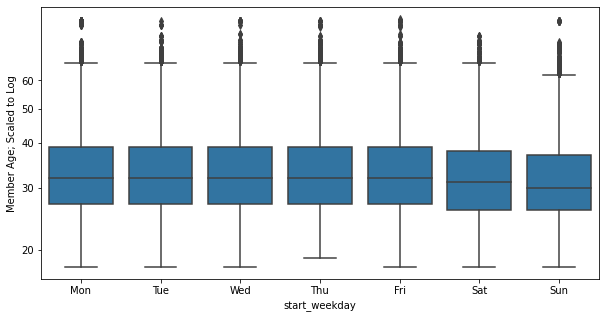

In [55]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)    

age_log = fordgo_v2['member_age']

plt.figure(figsize = [10, 5])

sb.boxplot(data = fordgo_v2, x = 'start_weekday', y = age_log.apply(log_trans), color = base_color)
plt.yticks(log_trans(np.array([20, 30, 40, 50, 60])), ['20', '30', '40', '50', '60'])
plt.ylabel('Member Age; Scaled to Log');

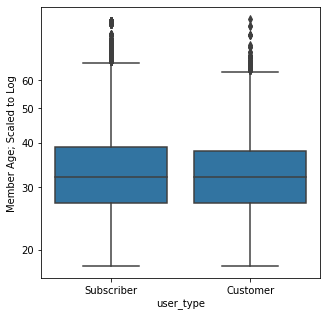

In [56]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)    

age_log = fordgo_v2['member_age']

plt.figure(figsize = [5, 5])

sb.boxplot(data = fordgo_v2, x = 'user_type', y = age_log.apply(log_trans), color = base_color)
plt.yticks(log_trans(np.array([20, 30, 40, 50, 60])), ['20', '30', '40', '50', '60'])
plt.ylabel('Member Age; Scaled to Log');

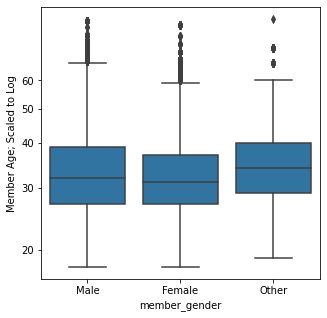

In [57]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)    

age_log = fordgo_v2['member_age']

plt.figure(figsize = [5, 5])

sb.boxplot(data = fordgo_v2, x = 'member_gender', y = age_log.apply(log_trans), color = base_color)
plt.yticks(log_trans(np.array([20, 30, 40, 50, 60])), ['20', '30', '40', '50', '60'])
plt.ylabel('Member Age; Scaled to Log');

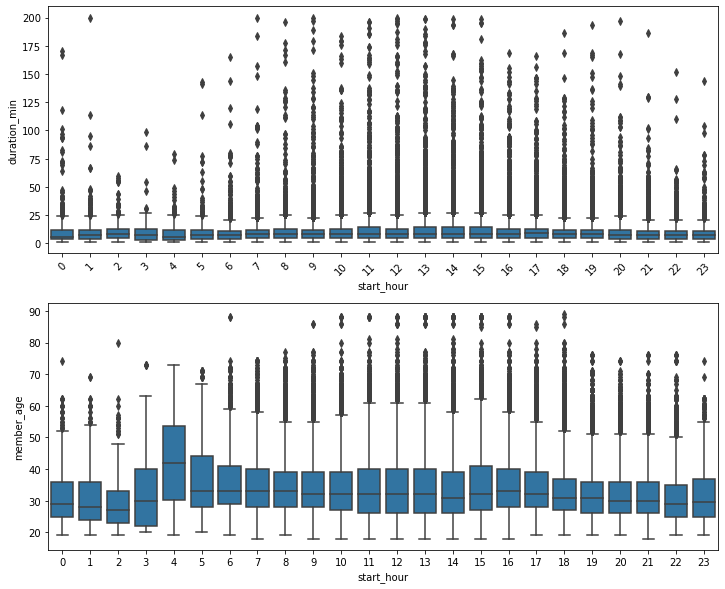

In [59]:
plt.figure(figsize = [12, 10])

plt.subplot(2, 1, 1)
sb.boxplot(data = fordgo_v2, x = 'start_hour', y = 'duration_min', color = base_color)
plt.xticks(rotation = 45)

plt.subplot(2, 1, 2)
sb.boxplot(data = fordgo_v2, x = 'start_hour', y = 'member_age', color = base_color);

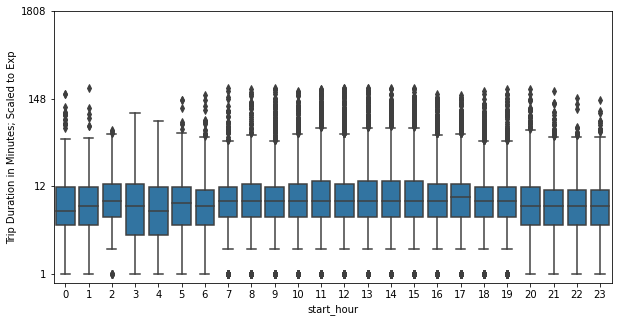

In [60]:
def exp_trans(x, inverse = False):
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x)    

duration_exp = fordgo_v2['duration_min']

plt.figure(figsize = [10, 5])

bin_edges = np.arange(0, exp_trans(data.max())+0.5, 0.5)
tick_locs = np.arange(0, exp_trans(data.max())+2.5, 2.5)
sb.boxplot(data = fordgo_v2, x = 'start_hour', y = duration_exp.apply(exp_trans), color = base_color)
plt.yticks(tick_locs, exp_trans(tick_locs, inverse = True).astype(int))
plt.ylabel('Trip Duration in Minutes; Scaled to Exp');

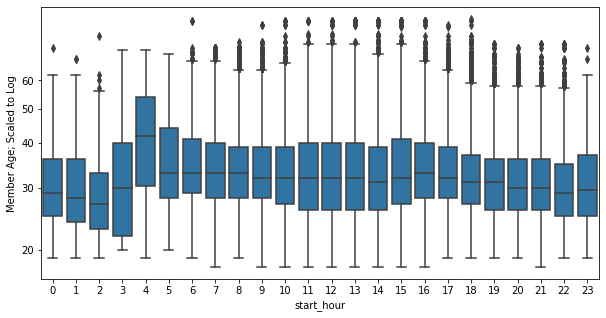

In [61]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)    

age_log = fordgo_v2['member_age']

plt.figure(figsize = [10, 5])

sb.boxplot(data = fordgo_v2, x = 'start_hour', y = age_log.apply(log_trans), color = base_color)
plt.yticks(log_trans(np.array([20, 30, 40, 50, 60])), ['20', '30', '40', '50', '60'])
plt.ylabel('Member Age; Scaled to Log');

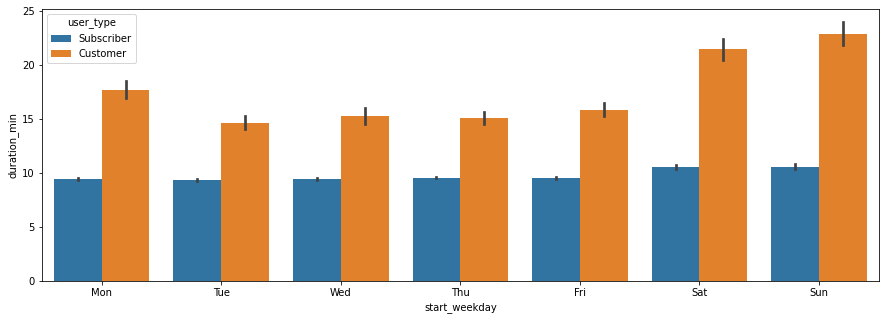

In [62]:
plt.figure(figsize = [15, 5])
ax = sb.barplot(data = fordgo_v2, x = 'start_weekday', y = 'duration_min', hue = 'user_type');

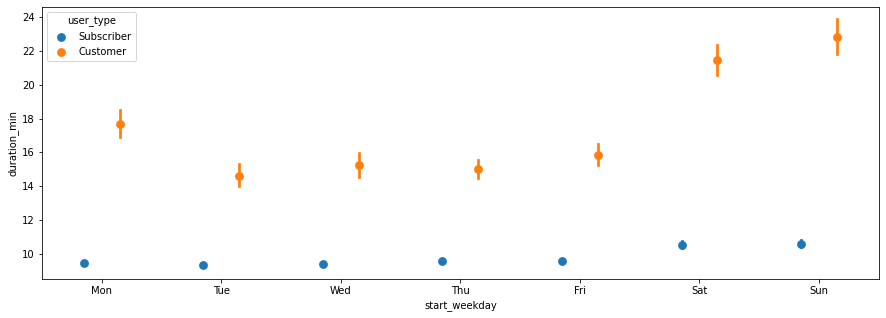

In [63]:
plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = fordgo_v2, x = 'start_weekday', y = 'duration_min', hue = 'user_type', 
                  linestyles = '', dodge = 0.3);

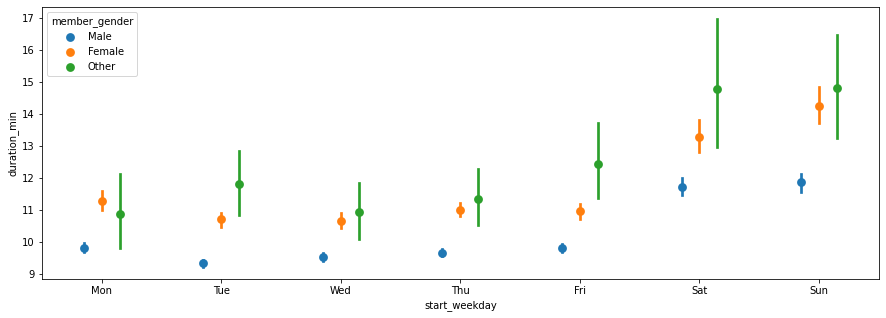

In [64]:
plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = fordgo_v2, x = 'start_weekday', y = 'duration_min', hue = 'member_gender', 
                  linestyles = '', dodge = 0.3);

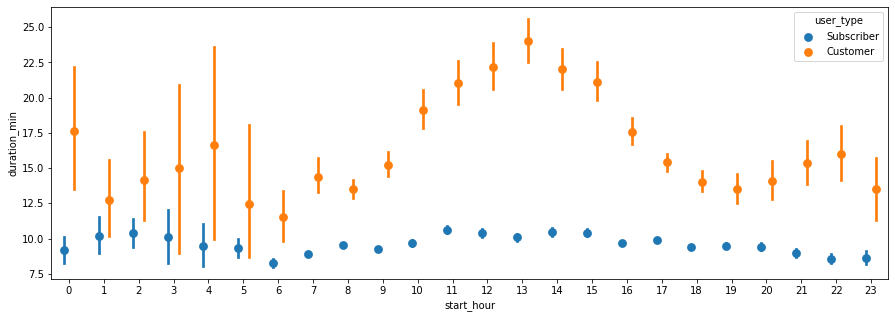

In [65]:
plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = fordgo_v2, x = 'start_hour', y = 'duration_min', hue = 'user_type', 
                  linestyles = '', dodge = 0.3);

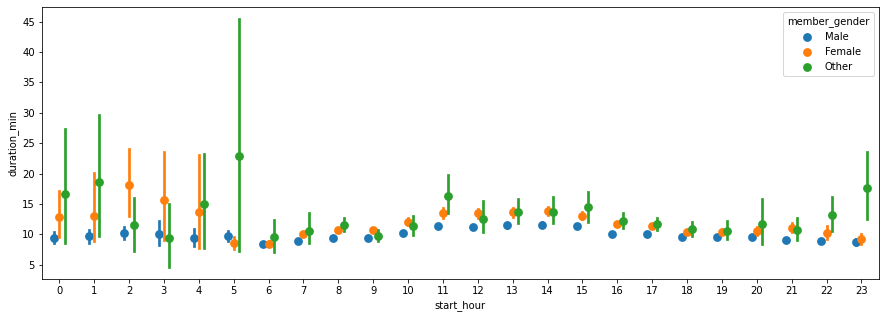

In [66]:
plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = fordgo_v2, x = 'start_hour', y = 'duration_min', hue = 'member_gender', 
                  linestyles = '', dodge = 0.3);

In [ ]:
fordgo_v2.to_csv('fordgo_v2.csv', index = False)